In [79]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import Image

import sys
sys.path.append("/home/jebradbury39/.local/lib/python3.5/site-packages")
import pydotplus

In [2]:
allData = pd.read_csv("/share/GithubAnalysis/pullFiles/combined/combined.csv").drop("Unnamed: 0", axis=1)
allData.head()

,additions,body,changed_files,created_at,deletions,description,event_time,forks_count,has_wiki,language,name,number_commits,open_issues_count,secondary_user,size,user_login,watchers_count
0,81.0,NaN,13.0,2015-10-20T18:21:36Z,178.0,"News, and upcoming releases from the Adventure...",2016-12-12 00:32:15,0,False,CSS,adventurerscodex.github.io,4.0,7,NaN,33379,Sonictherocketman,1
1,366.0,Issue #316\r\n\r\nTorre Agbar:\r\nModel in ble...,13.0,2016-09-27T19:26:16Z,0.0,Video Game project 2016 Software Engineering. ...,2016-12-12 00:21:50,0,True,C#,ES2016B,5.0,17,NaN,271098,jdomenmi7,8
2,104.0,"Updated ""Migration from older versions"" chapte...",2.0,2011-12-09T15:15:43Z,0.0,REST and JAXRS,2016-12-12 00:15:40,652,False,Java,Resteasy,1.0,46,NaN,39365,ronsigal,546
3,4380.0,NaN,4.0,2016-11-20T19:14:17Z,0.0,NaN,2016-12-12 00:10:56,0,True,Jupyter Notebook,Renju,3.0,2,NaN,1241,storandrew,0
4,1.0,NaN,1.0,2016-12-11T16:27:13Z,0.0,NaN,2016-12-12 00:45:07,0,True,NaN,proyect,1.0,1,NaN,0,jlog1994,0


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

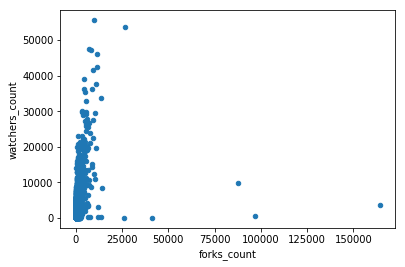

In [53]:
data = allData.drop_duplicates("name").sort_values("watchers_count", ascending=False)
data = data[data["watchers_count"] < 200000]
data.plot.scatter("forks_count", "watchers_count")

In [73]:
data["has_wiki"] = (data["has_wiki"] == True) * 1

__Linear Regression__

In [66]:
model = LinearRegression()
trainX = data[["forks_count"]]

trainX = (trainX - trainX.mean()) / trainX.std()

model.fit(X=trainX, y=data["watchers_count"])
-cross_val_score(model, trainX, data["watchers_count"], cv=10, scoring="neg_mean_squared_error").mean()

1040760.6316937025

__KNN__

In [57]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=3)
model.fit(X=trainX, y=data["watchers_count"])
-cross_val_score(model, trainX, data["watchers_count"], cv=10, scoring="neg_mean_squared_error").mean()

1187329.9103369969

__Decision Tree__

In [75]:
from sklearn import tree

model = tree.DecisionTreeRegressor()
trainX = data[["has_wiki", "size", "forks_count"]]

trainX = (trainX - trainX.mean()) / trainX.std()

model.fit(X=trainX, y=data["watchers_count"])
-cross_val_score(model, trainX, data["watchers_count"], cv=10, scoring="neg_mean_squared_error").mean()

714294.9870870912

In [70]:
tree.export_graphviz(model, out_file="test")

In [80]:
dot_data = tree.export_graphviz(model, out_file=None, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

KeyboardInterrupt: 